In [31]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [33]:
df = pd.read_csv('Spam2.csv')
df.head()

,target,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [35]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [39]:
import nltk
import re

In [41]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [43]:
lemmatizer = WordNetLemmatizer()
corpus=[]

for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
y=pd.get_dummies(df['target'])
y=y.iloc[:,1].values
y

array([False, False,  True, ..., False, False, False])

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [57]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[949,   0],
       [ 46, 120]], dtype=int64)

<Axes: >

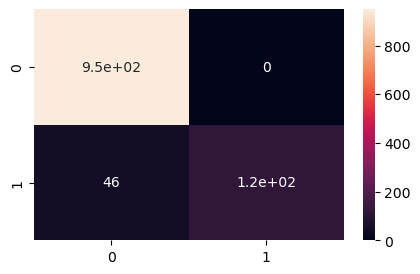

In [61]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (5,3))
sn.heatmap(matrix, annot=True)

In [65]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision Score:",metrics.precision_score(y_test,y_pred))
print("Recall Score:",metrics.recall_score(y_test,y_pred))
print("f1 score:",metrics.f1_score(y_test,y_pred))

Accuracy: 0.9587443946188341
Precision Score: 1.0
Recall Score: 0.7228915662650602
f1 score: 0.8391608391608392


In [67]:
def classify_message(message):
    # Step 1: Preprocess
    review = re.sub('[^a-zA-Z]', ' ', message)
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)

    # Step 2: Transform using the fitted TfidfVectorizer
    vectorized_message = cv.transform([review]).toarray()

    # Step 3: Predict
    prediction = spam_detect_model.predict(vectorized_message)

    # Output result
    return "Spam" if prediction[0] == 1 else "Not Spam"

In [75]:
classify_message("you have won 1000 click on http://localhost:8889/notebooks/Downloads/SMS%20Spam%20Classifier/SMS_Spam_Classifier.ipynb?")

'Spam'